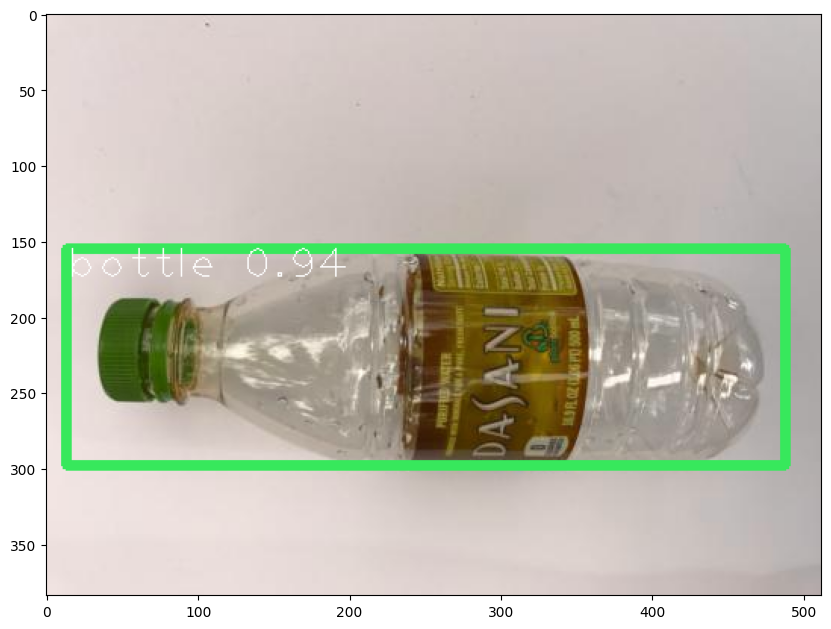

In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

weights = os.path.join('yolo','yolov3.weights')
cfg = os.path.join('yolo','yolov3.cfg') 
coco = os.path.join('yolo','coco.names')

net = cv2.dnn.readNet(weights,cfg)
classes=[]

with open(coco,'r') as f:
    classes=f.read().splitlines()
    
classes
layers_names_all = net.getLayerNames() 
image_input = cv2.imread(r"D:\TRICES\Projects\Products\Project A - Force\Machine Learning\Phase 4\data\trash\plastic_225.jpg")

image_input_shape = image_input.shape


plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)
height, width = image_input_shape[:2]
height, width

net.setInput(blob)
output_layers_name=net.getUnconnectedOutLayersNames()
layeroutput=net.forward(output_layers_name)
boxes=[]
confidences=[]
class_ids=[]

for output in layeroutput:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        if confidence>0.5:
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
        
            x=int(center_x-w/2)
            y=int(center_y-h/2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
len(boxes)
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]
    
    cv2.rectangle(image_input, (x, y), (x + w, y + h), color, 5)
    cv2.putText(image_input, label + " " + confi, (x, y + 20), font, 2, (255, 255, 255), 1)
   

plt.imshow(image_input)